In [28]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
df = pd.read_excel ('/content/drive/My Drive/ml_data/absent.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               740 non-null    int64
 1   Reason for absence               740 non-null    int64
 2   Month of absence                 740 non-null    int64
 3   Day of the week                  740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation expense           740 non-null    int64
 6   Distance from Residence to Work  740 non-null    int64
 7   Service time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9   Work load Average/day            740 non-null    int64
 10  Hit target                       740 non-null    int64
 11  Disciplinary failure             740 non-null    int64
 12  Education                        740 non-null    i

In [ ]:
print(df)
print("Number of rows:"+str(df['ID'].count()))

     ID  Reason for absence  ...  Body mass index  Absenteeism time in hours
0    11                  26  ...               30                          4
1    36                   0  ...               31                          0
2     3                  23  ...               31                          2
3     7                   7  ...               24                          4
4    11                  23  ...               30                          2
..   ..                 ...  ...              ...                        ...
735  11                  14  ...               30                          8
736   1                  11  ...               29                          4
737   4                   0  ...               34                          0
738   8                   0  ...               35                          0
739  35                   0  ...               25                          0

[740 rows x 21 columns]
Number of rows:740


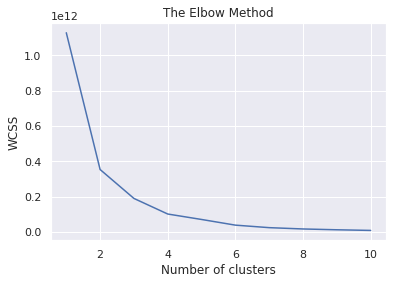

In [ ]:
from sklearn.cluster import KMeans
wcss =[] #WCSS (within-cluster sums of squares) will necessarily maximize the distance between clusters.
for i in range (1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_) #(Inertia is the sum of squared error for each cluster. Smaller the inertia, denser
# Plot the graph to visualize the Elbow Method to find the optimal number of cluster
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
#Can be used to detect the principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(df)
print(pca.explained_variance_ratio_)
df1=pca.fit_transform(df)
print(df1)

[9.99996471e-01 2.96324021e-06 1.70337899e-07 1.33205604e-07
 1.10228617e-07]
[[-3.19362352e+04  6.77457399e+01 -8.29911748e+00  8.19442931e+00
  -8.10816300e+00]
 [-3.19362350e+04 -1.05464841e+02  1.30684129e+01  1.34597099e+01
  -1.63828979e+01]
 [-3.19362368e+04 -4.06920479e+01 -2.99690620e+01  1.40534968e+00
   1.25490084e+00]
 ...
 [-2.71235887e+02 -1.03939761e+02 -4.75188305e+00  1.64988420e+01
  -1.28578155e+01]
 [-2.71235302e+02  9.56557616e+00 -1.43629262e+01  1.69582165e+01
  -1.27585969e+01]
 [-2.71234958e+02 -4.20072344e+01 -4.40808489e+00 -8.17176829e+00
   7.41536034e-01]]


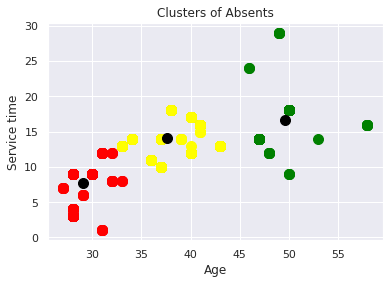

In [ ]:
df1=np.array(df[['Age','Service time']])
#print(df1)
# Applying KMeans to the dataset with the optimal number of cluster
kmeans=KMeans(n_clusters= 3, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 0)
Y_Kmeans = kmeans.fit_predict(df1)

#df1=np.array(df[['Distance from Residence to Work','Absenteeism time in hours']])
plt.scatter(df1[Y_Kmeans == 0, 0], df1[Y_Kmeans == 0,1],s = 100, c='yellow', label = 'Cluster 1')
plt.scatter(df1[Y_Kmeans == 1, 0], df1[Y_Kmeans == 1,1],s = 100, c='green', label = 'Cluster 2')
plt.scatter(df1[Y_Kmeans == 2, 0], df1[Y_Kmeans == 2,1],s = 100, c='red', label = 'Cluster 3')
plt.scatter(df1[Y_Kmeans == 3, 0], df1[Y_Kmeans == 3,1],s = 100, c='blue', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters of Absents')
plt.xlabel('Age')
plt.ylabel('Service time')
#plt.legend()
plt.show()

For n_clusters = 3 The average silhouette_score is : 0.5478255546098995


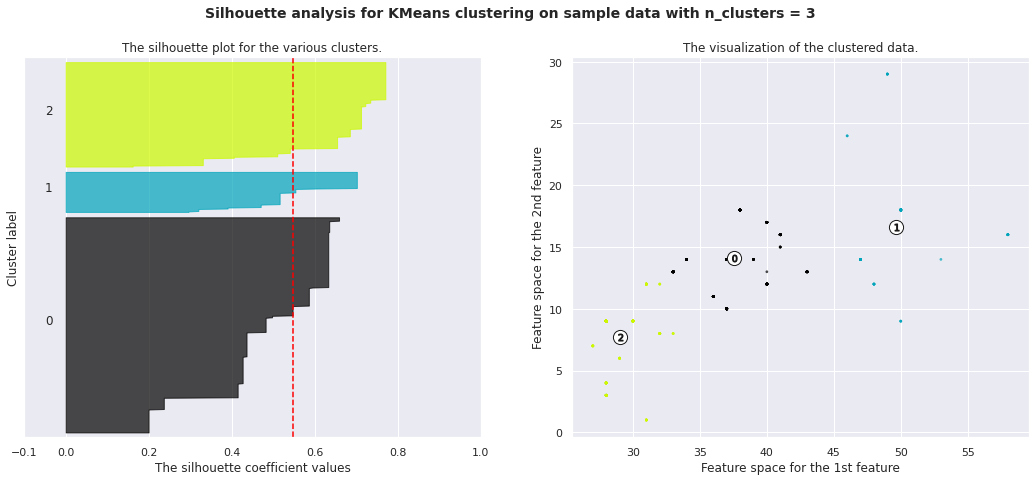

In [35]:
n_clusters=3
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(df1) + (n_clusters + 1) * 10])

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(df1, Y_Kmeans)
print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(df1, Y_Kmeans)

y_lower = 10
for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[Y_Kmeans == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(Y_Kmeans.astype(float) / n_clusters)
ax2.scatter(df1[:, 0], df1[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

# Labeling the clusters
centers = kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Age")
ax2.set_ylabel("Service Time")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

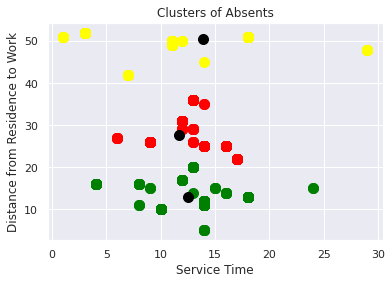

In [36]:
df1=np.array(df[['Service time','Distance from Residence to Work']])
#print(df1)
# Applying KMeans to the dataset with the optimal number of cluster
kmeans=KMeans(n_clusters= 3, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 0)
Y_Kmeans = kmeans.fit_predict(df1)

plt.scatter(df1[Y_Kmeans == 0, 0], df1[Y_Kmeans == 0,1],s = 100, c='yellow', label = 'Cluster 1')
plt.scatter(df1[Y_Kmeans == 1, 0], df1[Y_Kmeans == 1,1],s = 100, c='green', label = 'Cluster 2')
plt.scatter(df1[Y_Kmeans == 2, 0], df1[Y_Kmeans == 2,1],s = 100, c='red', label = 'Cluster 3')
plt.scatter(df1[Y_Kmeans == 3, 0], df1[Y_Kmeans == 3,1],s = 100, c='blue', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters of Absents')
plt.xlabel('Service Time')
plt.ylabel('Distance from Residence to Work')
#plt.legend()
plt.show()

For n_clusters = 3 The average silhouette_score is : 0.6253522754322824


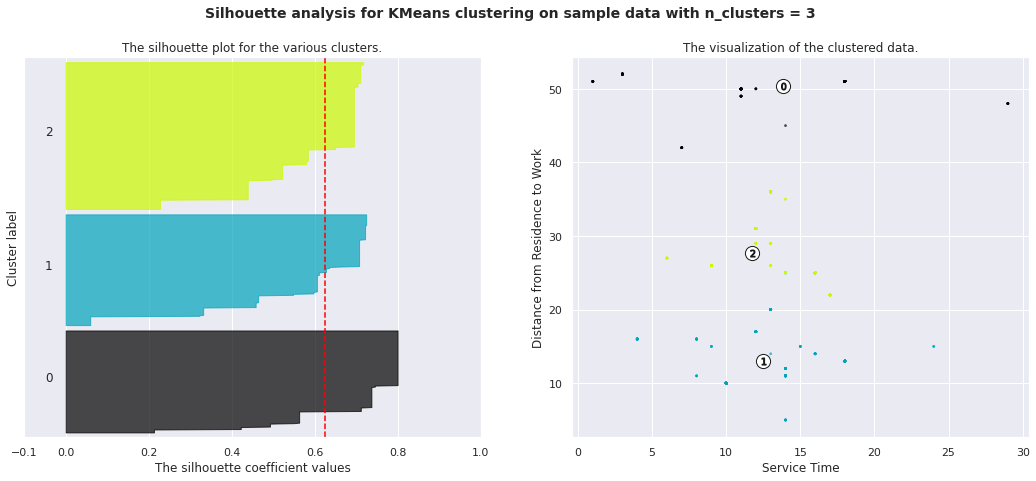

In [38]:
n_clusters=3
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(df1) + (n_clusters + 1) * 10])

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(df1, Y_Kmeans)
print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(df1, Y_Kmeans)

y_lower = 10
for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[Y_Kmeans == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(Y_Kmeans.astype(float) / n_clusters)
ax2.scatter(df1[:, 0], df1[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

# Labeling the clusters
centers = kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Service Time")
ax2.set_ylabel("Distance from Residence to Work")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

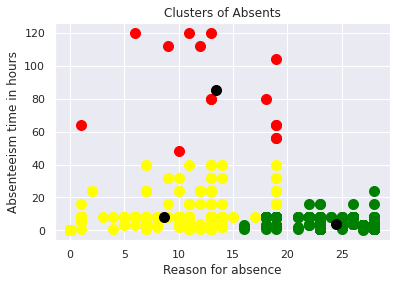

In [39]:
df1=np.array(df[['Reason for absence','Absenteeism time in hours']])
#print(df1)
# Applying KMeans to the dataset with the optimal number of cluster
kmeans=KMeans(n_clusters= 3, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 0)
Y_Kmeans = kmeans.fit_predict(df1)

plt.scatter(df1[Y_Kmeans == 0, 0], df1[Y_Kmeans == 0,1],s = 100, c='yellow', label = 'Cluster 1')
plt.scatter(df1[Y_Kmeans == 1, 0], df1[Y_Kmeans == 1,1],s = 100, c='green', label = 'Cluster 2')
plt.scatter(df1[Y_Kmeans == 2, 0], df1[Y_Kmeans == 2,1],s = 100, c='red', label = 'Cluster 3')
plt.scatter(df1[Y_Kmeans == 3, 0], df1[Y_Kmeans == 3,1],s = 100, c='blue', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters of Absents')
plt.xlabel('Reason for absence')
plt.ylabel('Absenteeism time in hours')
#plt.legend()
plt.show()

For n_clusters = 3 The average silhouette_score is : 0.5913155525360271


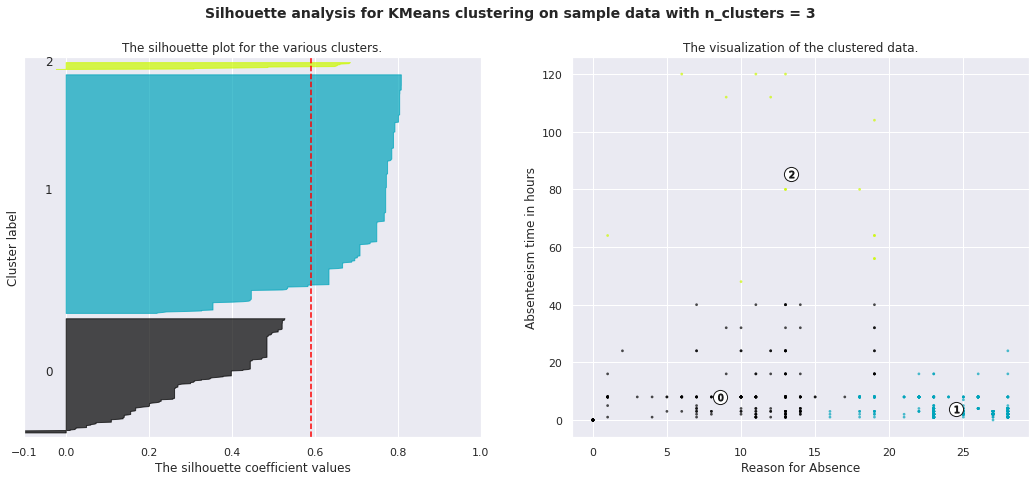

In [41]:
n_clusters=3
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(df1) + (n_clusters + 1) * 10])

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(df1, Y_Kmeans)
print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(df1, Y_Kmeans)

y_lower = 10
for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[Y_Kmeans == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(Y_Kmeans.astype(float) / n_clusters)
ax2.scatter(df1[:, 0], df1[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

# Labeling the clusters
centers = kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Reason for Absence")
ax2.set_ylabel("Absenteeism time in hours")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain

In [ ]:
!jupyter nbconvert --to PDF "/content/drive/My Drive/Colab Notebooks/Lab3.ipynb"

[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/Lab3.ipynb to PDF
[NbConvertApp] Support files will be in Lab3_files/
[NbConvertApp] Making directory ./Lab3_files
[NbConvertApp] Making directory ./Lab3_files
[NbConvertApp] Making directory ./Lab3_files
[NbConvertApp] Making directory ./Lab3_files
[NbConvertApp] Writing 68970 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 102957 bytes to /content/drive/My Drive/Colab Notebooks/Lab3.pdf
